In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
train_label_t = pd.read_json(r"C:\Users\Pratyush\SWITCHdrive\grl-baseline\myprotocol\train_label_t.json")
train_label_v = pd.read_json(r"C:\Users\Pratyush\SWITCHdrive\grl-baseline\myprotocol\train_label_v.json")
test_label = pd.read_json(r"C:\Users\Pratyush\SWITCHdrive\grl-baseline\myprotocol\test_label.json")

# Analysis Plots

In [66]:
train_label_t=train_label_t.T
train_label_v=train_label_v.T
test_label=test_label.T

In [67]:
train_label_t.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Data/train/7349/spoof/117094.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,1,1,1
Data/train/7078/spoof/091946.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,2,2,1
Data/train/1470/spoof/088278.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,1,1
Data/train/8431/spoof/433770.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,1,1,1
Data/train/545/spoof/278212.jpg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,1


In [91]:
print(len(train_label_t))
print(len(train_label_v))
print(len(test_label))

444964
49441
67170


# Overall Spoof type plot

In [96]:
spoof_type_tr = train_label_t[40].value_counts()
spoof_type_v = train_label_v[40].value_counts()
spoof_type_te = test_label[40].value_counts()

In [97]:
label_tr = train_label_t[43].value_counts()
label_v = train_label_v[43].value_counts()
label_te = test_label[43].value_counts()


In [137]:
total_live = label_tr[0] + label_v[0] + label_te[0] #total live samples
spf_1 = spoof_type_tr[1] + spoof_type_v[1] + spoof_type_te[1] #spoof type 1 and so on..
spf_2 = spoof_type_tr[2] + spoof_type_v[2] + spoof_type_te[2] 
spf_3 = spoof_type_tr[3] + spoof_type_v[3] + spoof_type_te[3] 
spf_4 = spoof_type_tr[4] + spoof_type_v[4] + spoof_type_te[4] 
spf_5 = spoof_type_tr[5] + spoof_type_v[5] + spoof_type_te[5] 
spf_6 = spoof_type_tr[6] + spoof_type_v[6] + spoof_type_te[6] 
spf_7 = spoof_type_tr[7] + spoof_type_v[7] + spoof_type_te[7] 
spf_8 = spoof_type_tr[8] + spoof_type_v[8] + spoof_type_te[8] 
spf_9 = spoof_type_tr[9] + spoof_type_v[9] + spoof_type_te[9] 
spf_10 = spoof_type_tr[10] + spoof_type_v[10] + spoof_type_te[10] 

In [138]:
total_samples = 444964 + 49441 + 67170
percent_live = (total_live/total_samples) * 100
percent_spf_1 = (spf_1/total_samples) * 100
percent_spf_2 = (spf_2/total_samples) * 100
percent_spf_3 = (spf_3/total_samples) * 100
percent_spf_4 = (spf_4/total_samples) * 100
percent_spf_5 = (spf_5/total_samples) * 100
percent_spf_6 = (spf_6/total_samples) * 100
percent_spf_7 = (spf_7/total_samples) * 100
percent_spf_8 = (spf_8/total_samples) * 100
percent_spf_9 = (spf_9/total_samples) * 100
percent_spf_10 = (spf_10/total_samples) * 100

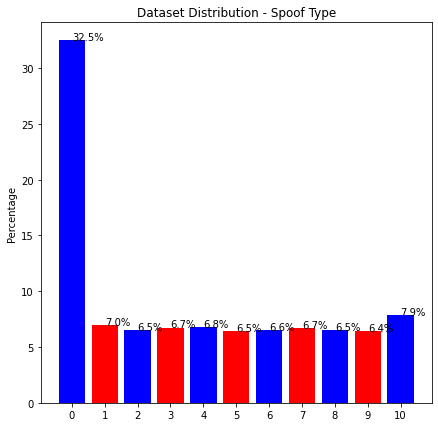

In [141]:
objects = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
y_pos = np.arange(len(objects))
percentage = [percent_live, percent_spf_1, percent_spf_2, percent_spf_3, percent_spf_4, percent_spf_5, percent_spf_6, percent_spf_7, percent_spf_8, percent_spf_9, percent_spf_10]
plt.figure(figsize=(7,7))
plt.bar(y_pos, percentage, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Dataset Distribution - Spoof Type')
for index, value in enumerate(percentage):
    plt.text(index, value, str(round(value,1))+"%")

plt.show()


# Combination of illumination condition +  Environment condition

In [194]:
#train_label_v.head()

In [186]:
#41 - 0 to 4 and #42 - 0 to 2
samples_v = []
samples_te = []
for i in range(5):
    for j in range(3):
        samples_v.append(len(train_label_v.loc[(train_label_v[41] == i) & (train_label_v[42] == j)]))
        samples_te.append(len(test_label.loc[(test_label[41] == i) & (test_label[42] == j)]))
        
        

In [183]:
#train_label_v.loc[(train_label_v[41] == 1) & (train_label_v[42] == 1)]

In [187]:
print(samples_v)
print(samples_te)

[16246, 0, 0, 0, 14910, 4735, 0, 5050, 1552, 0, 2758, 786, 0, 2633, 771]
[19923, 0, 0, 0, 31897, 3222, 0, 4700, 1271, 0, 1542, 919, 0, 2583, 1113]


In [188]:
for i in range(len(samples_v)):
    samples_v[i] = (samples_v[i]/len(train_label_v)) * 100
for i in range(len(samples_te)):
    samples_te[i] = (samples_te[i]/len(test_label)) * 100

In [190]:
print(samples_v)
print(samples_te)

[32.85936773123521, 0.0, 0.0, 0.0, 30.157157015432535, 9.577071661171901, 0.0, 10.214194696709209, 3.139095083028256, 0.0, 5.578366133371089, 1.5897736696264233, 0.0, 5.3255395319673955, 1.5594344774579803]
[29.660562751228227, 0.0, 0.0, 0.0, 47.48697335119845, 4.796784278695846, 0.0, 6.997171356260236, 1.8922137859163315, 0.0, 2.295667708798571, 1.3681703141283312, 0.0, 3.8454667262170608, 1.656989727556945]


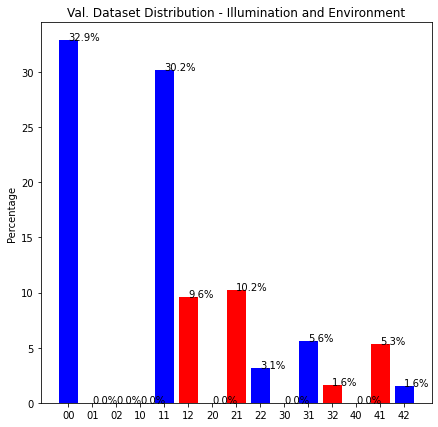

In [192]:
objects = ('00', '01', '02', '10', '11', '12', '20', '21', '22', '30', '31', '32', '40', '41', '42')
y_pos = np.arange(len(objects))
percentage_v = [samples_v[0],samples_v[1],samples_v[2],samples_v[3],samples_v[4],samples_v[5],samples_v[6],samples_v[7],samples_v[8],samples_v[9],samples_v[10],samples_v[11],samples_v[12],samples_v[13],samples_v[14]]
#percentage_te = [samples_te[0],samples_te[1],samples_te[2],samples_te[3],samples_te[4],samples_te[5],samples_te[6],samples_te[7],samples_te[8],samples_te[9],samples_te[10],samples_te[11],samples_te[12],samples_te[13],samples_te[14]]
plt.figure(figsize=(7,7))
plt.bar(y_pos, percentage_v, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Val. Dataset Distribution - Illumination and Environment')
for index, value in enumerate(percentage_v):
    plt.text(index, value, str(round(value,1))+"%")

plt.show()

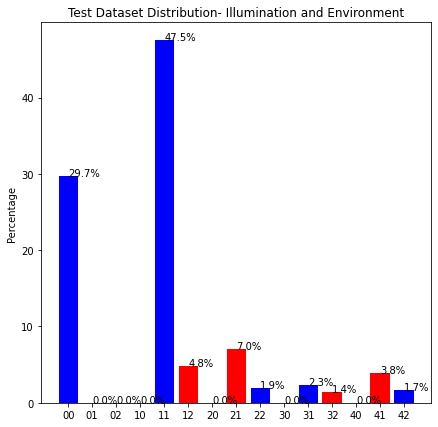

In [193]:
objects = ('00', '01', '02', '10', '11', '12', '20', '21', '22', '30', '31', '32', '40', '41', '42')
y_pos = np.arange(len(objects))
percentage_te = [samples_te[0],samples_te[1],samples_te[2],samples_te[3],samples_te[4],samples_te[5],samples_te[6],samples_te[7],samples_te[8],samples_te[9],samples_te[10],samples_te[11],samples_te[12],samples_te[13],samples_te[14]]
plt.figure(figsize=(7,7))
plt.bar(y_pos, percentage_te, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Test Dataset Distribution- Illumination and Environment')
for index, value in enumerate(percentage_te):
    plt.text(index, value, str(round(value,1))+"%")

plt.show()

# 3 Combination of Spoof type +  Environment condition


In [222]:
#train_label_v.loc[(train_label_v[40] == 1) & (train_label_v[42] == 2)]

In [203]:
samples3_v = []
samples3_te = []
for i in range(11):
    for j in range(3):
        samples3_v.append(len(train_label_v.loc[(train_label_v[40] == i) & (train_label_v[42] == j)]))
        samples3_te.append(len(test_label.loc[(test_label[40] == i) & (test_label[42] == j)]))

In [208]:
print(samples3_v)
print(samples3_te)

[16246, 0, 0, 0, 2752, 803, 0, 2367, 755, 0, 2462, 716, 0, 2528, 837, 0, 2215, 802, 0, 2524, 804, 0, 2445, 662, 0, 2621, 687, 0, 2394, 759, 0, 3043, 1019]
[19923, 0, 0, 0, 3177, 423, 0, 5366, 55, 0, 5889, 194, 0, 3331, 956, 0, 6088, 9, 0, 2709, 821, 0, 6477, 0, 0, 2162, 1497, 0, 3161, 1322, 0, 2362, 1248]


In [209]:
for i in range(len(samples3_v)):
    samples3_v[i] = (samples3_v[i]/len(train_label_v)) * 100
for i in range(len(samples3_te)):
    samples3_te[i] = (samples3_te[i]/len(test_label)) * 100

In [210]:
print(samples3_v)
print(samples3_te)

[32.85936773123521, 0.0, 0.0, 0.0, 5.566230456503711, 1.6241580874173256, 0.0, 4.787524524180336, 1.5270726724783075, 0.0, 4.979672741247143, 1.4481907728403551, 0.0, 5.113165186788294, 1.6929269229991304, 0.0, 4.480087376873445, 1.622135474606096, 0.0, 5.105074735543376, 1.6261807002285553, 0.0, 4.945288323456241, 1.3389696810339597, 0.0, 5.301268178232641, 1.3895350013146983, 0.0, 4.8421350700835335, 1.5351631237232257, 0.0, 6.154810784571509, 2.061042454642908]
[29.660562751228227, 0.0, 0.0, 0.0, 4.729790084859312, 0.6297454220634211, 0.0, 7.9886854250409405, 0.0818817924668751, 0.0, 8.76730683340777, 0.28881941342861395, 0.0, 4.959059103766562, 1.4232544290605924, 0.0, 9.063570046151556, 0.013398838767306832, 0.0, 4.033050468959357, 1.2222718475509902, 0.0, 9.642697632871817, 0.0, 0.0, 3.218698823879708, 2.2286735149620367, 0.0, 4.705969927050766, 1.9681405389310704, 0.0, 3.516450796486527, 1.8579723090665474]


33

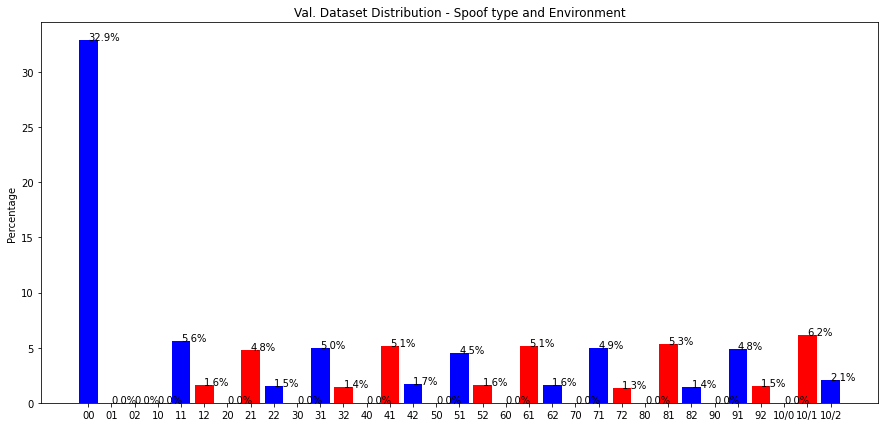

In [219]:
objects = ('00', '01', '02', '10', '11', '12', '20', '21', '22', '30', '31', '32', '40', '41', '42','50', '51', '52', '60', '61', '62', '70', '71', '72', '80', '81', '82', '90', '91', '92', '10/0', '10/1', '10/2')
y_pos = np.arange(len(objects))
percentage3_v = []
for i in range(len(samples3_v)):
    percentage3_v.append(samples3_v[i])
plt.figure(figsize=(15,7))
plt.bar(y_pos, percentage3_v, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Val. Dataset Distribution - Spoof type and Environment')
for index, value in enumerate(percentage3_v):
     plt.text(index, value, str(round(value,1))+"%")

plt.show()

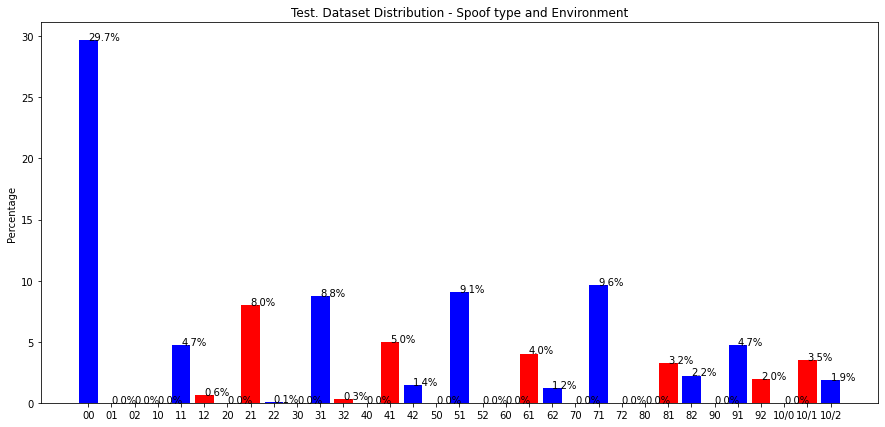

In [221]:
objects = ('00', '01', '02', '10', '11', '12', '20', '21', '22', '30', '31', '32', '40', '41', '42','50', '51', '52', '60', '61', '62', '70', '71', '72', '80', '81', '82', '90', '91', '92', '10/0', '10/1', '10/2')
y_pos = np.arange(len(objects))
percentage3_te = []
for i in range(len(samples3_te)):
    percentage3_te.append(samples3_te[i])
plt.figure(figsize=(15,7))
plt.bar(y_pos, percentage3_te, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Test. Dataset Distribution - Spoof type and Environment')
for index, value in enumerate(percentage3_te):
     plt.text(index, value, str(round(value,1))+"%")

plt.show()

# 4 Combination of Spoof type +  Illumination condition


In [232]:
samples4_v = []
samples4_te = []
for i in range(1,11):
    for j in range(1,5):
        samples4_v.append(len(train_label_v.loc[(train_label_v[40] == i) & (train_label_v[41] == j)]))
        samples4_te.append(len(test_label.loc[(test_label[40] == i) & (test_label[41] == j)]))

In [233]:
print(samples4_v)
print(samples4_te)

[2241, 649, 336, 329, 1861, 641, 334, 286, 1835, 691, 325, 327, 1990, 715, 344, 316, 1847, 552, 325, 293, 1951, 680, 384, 313, 1905, 533, 339, 330, 1872, 604, 385, 447, 1693, 749, 403, 308, 2450, 788, 369, 455]
[2687, 445, 188, 280, 3941, 1372, 102, 6, 4543, 519, 137, 884, 2827, 698, 374, 388, 6031, 66, 0, 0, 2073, 489, 305, 663, 6477, 0, 0, 0, 2113, 704, 327, 515, 2350, 906, 590, 637, 2077, 772, 438, 323]


In [234]:
for i in range(len(samples4_v)):
    samples4_v[i] = (samples4_v[i]/len(train_label_v)) * 100
for i in range(len(samples4_te)):
    samples4_te[i] = (samples4_te[i]/len(test_label)) * 100

In [235]:
print(samples4_v)
print(samples4_te)

[4.532675309965414, 1.3126757144879755, 0.6795979045731275, 0.6654396148945207, 3.7640824416981857, 1.2964948119981392, 0.6755526789506684, 0.5784672640116503, 3.7114945086062177, 1.3976254525596163, 0.6573491636496026, 0.6613943892720617, 4.0249994943467975, 1.4461681600291256, 0.6957788070629639, 0.6391456483485367, 3.735765862340972, 1.1164822717987097, 0.6573491636496026, 0.5926255536902572, 3.946117594708845, 1.3753767116360915, 0.7766833195121458, 0.633077809914848, 3.853077405392286, 1.0780526283853482, 0.6856657430068162, 0.6674622277057503, 3.7863311826217103, 1.2216581379826459, 0.7787059323233753, 0.9041079266196073, 3.424283489411622, 1.5149369956109302, 0.8151129629255072, 0.6229647458587003, 4.955401387512389, 1.5938188952488825, 0.7463441273437026, 0.9202888291094437]
[4.000297751972607, 0.6624981390501712, 0.27988685425040943, 0.416852761649546, 5.867202620217359, 2.042578532082775, 0.15185350602947745, 0.008932559178204555, 6.763436057763883, 0.7726663689146941, 0.2039

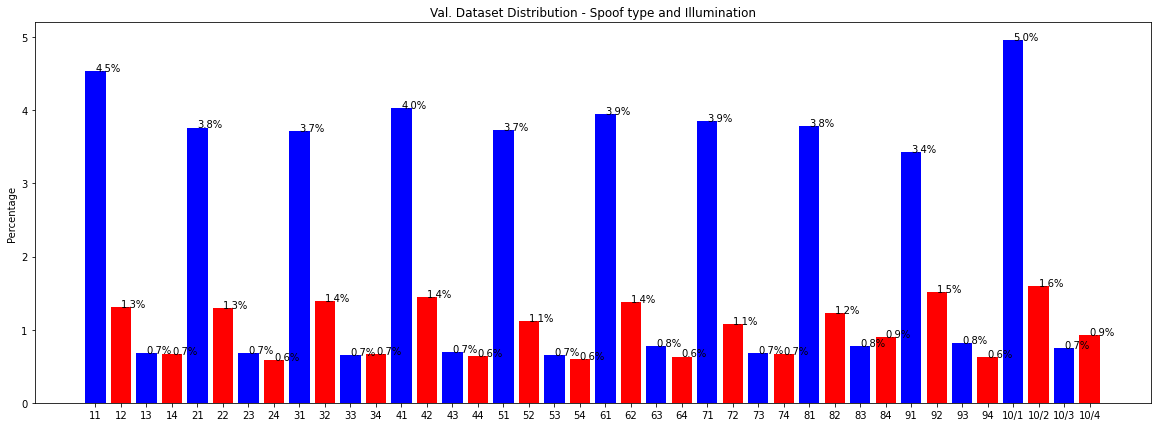

In [236]:
objects = ('11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44', '51', '52', '53', '54', '61', '62', '63', '64', '71', '72', '73', '74', '81', '82', '83', '84', '91', '92', '93', '94', '10/1', '10/2', '10/3', '10/4')
y_pos = np.arange(len(objects))
percentage4_v = []
for i in range(len(samples4_v)):
    percentage4_v.append(samples4_v[i])
plt.figure(figsize=(20,7))
plt.bar(y_pos, percentage4_v, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Val. Dataset Distribution - Spoof type and Illumination')
for index, value in enumerate(percentage4_v):
     plt.text(index, value, str(round(value,1))+"%")

plt.show()

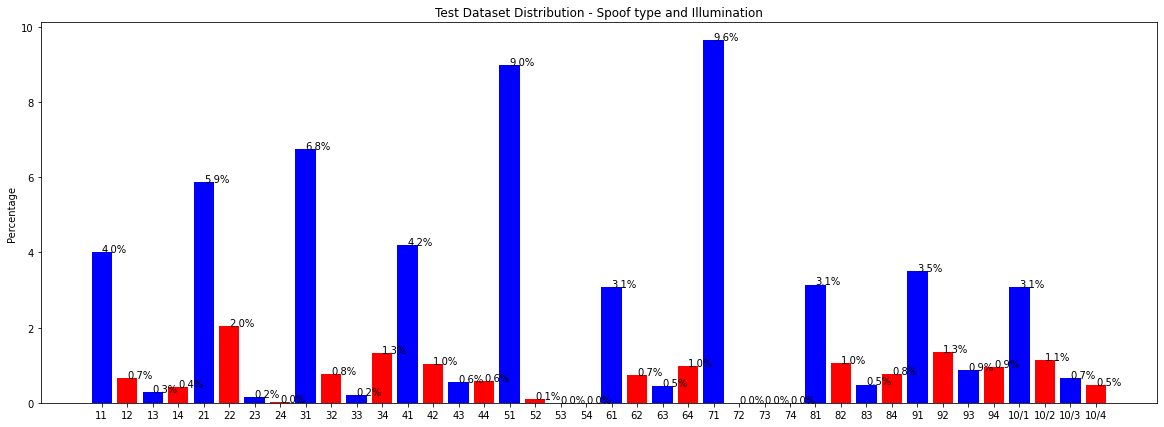

In [238]:
objects = ('11', '12', '13', '14', '21', '22', '23', '24', '31', '32', '33', '34', '41', '42', '43', '44', '51', '52', '53', '54', '61', '62', '63', '64', '71', '72', '73', '74', '81', '82', '83', '84', '91', '92', '93', '94', '10/1', '10/2', '10/3', '10/4')
y_pos = np.arange(len(objects))
percentage4_te= []
for i in range(len(samples4_te)):
    percentage4_te.append(samples4_te[i])
plt.figure(figsize=(20,7))
plt.bar(y_pos, percentage4_te, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Test Dataset Distribution - Spoof type and Illumination')
for index, value in enumerate(percentage4_te):
     plt.text(index, value, str(round(value,1))+"%")

plt.show()

# 5 Combination of Spoof type +  Illumination condition + Environment


In [246]:
samples5_v = []
samples5_te = []
for i in range(1,11):
    for j in range(1,5):
        for k in range(1,3):
            samples5_v.append(len(train_label_v.loc[(train_label_v[40] == i) & (train_label_v[41] == j) & (train_label_v[42] == k)]))
            samples5_te.append(len(test_label.loc[(test_label[40] == i) & (test_label[41] == j) & (test_label[42] == k)]))


In [251]:
print(samples5_v)
print(samples5_te)

[1749, 492, 476, 173, 258, 78, 269, 60, 1396, 465, 489, 152, 272, 62, 210, 76, 1436, 399, 536, 155, 241, 84, 249, 78, 1475, 515, 542, 173, 255, 89, 256, 60, 1341, 506, 394, 158, 253, 72, 227, 66, 1459, 492, 516, 164, 307, 77, 242, 71, 1457, 448, 473, 60, 275, 64, 240, 90, 1514, 358, 436, 168, 302, 83, 369, 78, 1253, 440, 622, 127, 300, 103, 219, 89, 1830, 620, 566, 222, 295, 74, 352, 103]
[2502, 185, 386, 59, 110, 78, 179, 101, 3906, 35, 1358, 14, 99, 3, 3, 3, 4471, 72, 476, 43, 90, 47, 852, 32, 2391, 436, 481, 217, 227, 147, 232, 156, 6022, 9, 66, 0, 0, 0, 0, 0, 1580, 493, 350, 139, 196, 109, 583, 80, 6477, 0, 0, 0, 0, 0, 0, 0, 1390, 723, 316, 388, 153, 174, 303, 212, 1779, 571, 733, 173, 446, 144, 203, 434, 1379, 698, 534, 238, 221, 217, 228, 95]


In [252]:
for i in range(len(samples5_v)):
    samples5_v[i] = (samples5_v[i]/len(train_label_v)) * 100
for i in range(len(samples5_te)):
    samples5_te[i] = (samples5_te[i]/len(test_label)) * 100

In [254]:
print(samples5_v)
print(samples5_te)

[3.5375498068404765, 0.9951255031249369, 0.962763698145264, 0.3499120163427115, 0.521834105297223, 0.15776379927590461, 0.544082846220748, 0.12135676867377276, 2.8235674844764467, 0.940514957221739, 0.9890576646912482, 0.30743714730689103, 0.5501506846544366, 0.1254019942962319, 0.4247486903582048, 0.15371857365344552, 2.9044719969256287, 0.807022511680589, 1.0841204668190367, 0.3135049857405797, 0.4874496875063207, 0.16989947614328188, 0.5036305899961571, 0.15776379927590461, 2.983353896563581, 1.0416455977832164, 1.0962561436864142, 0.3499120163427115, 0.5157662668635343, 0.1800125401994296, 0.5177888796747638, 0.12135676867377276, 2.7123237798588216, 1.0234420824821504, 0.7969094476244413, 0.31957282417426836, 0.5117210412410752, 0.14562812240852735, 0.45913310814910707, 0.13349244554115006, 2.950992091583908, 0.9951255031249369, 1.043668210594446, 0.33170850104164556, 0.6209421330474707, 0.15574118646467508, 0.48947230031755024, 0.1436055095972978, 2.946946865961449, 0.906130539430

In [264]:
#111 112, 121 122, 131 132, 141 142
obj=[]
for i in range(1,11):
    for j in range(1,5):
        for k in range(1,3):
            obj.append(str(i)+str(j)+str(k))
objects = tuple(obj)

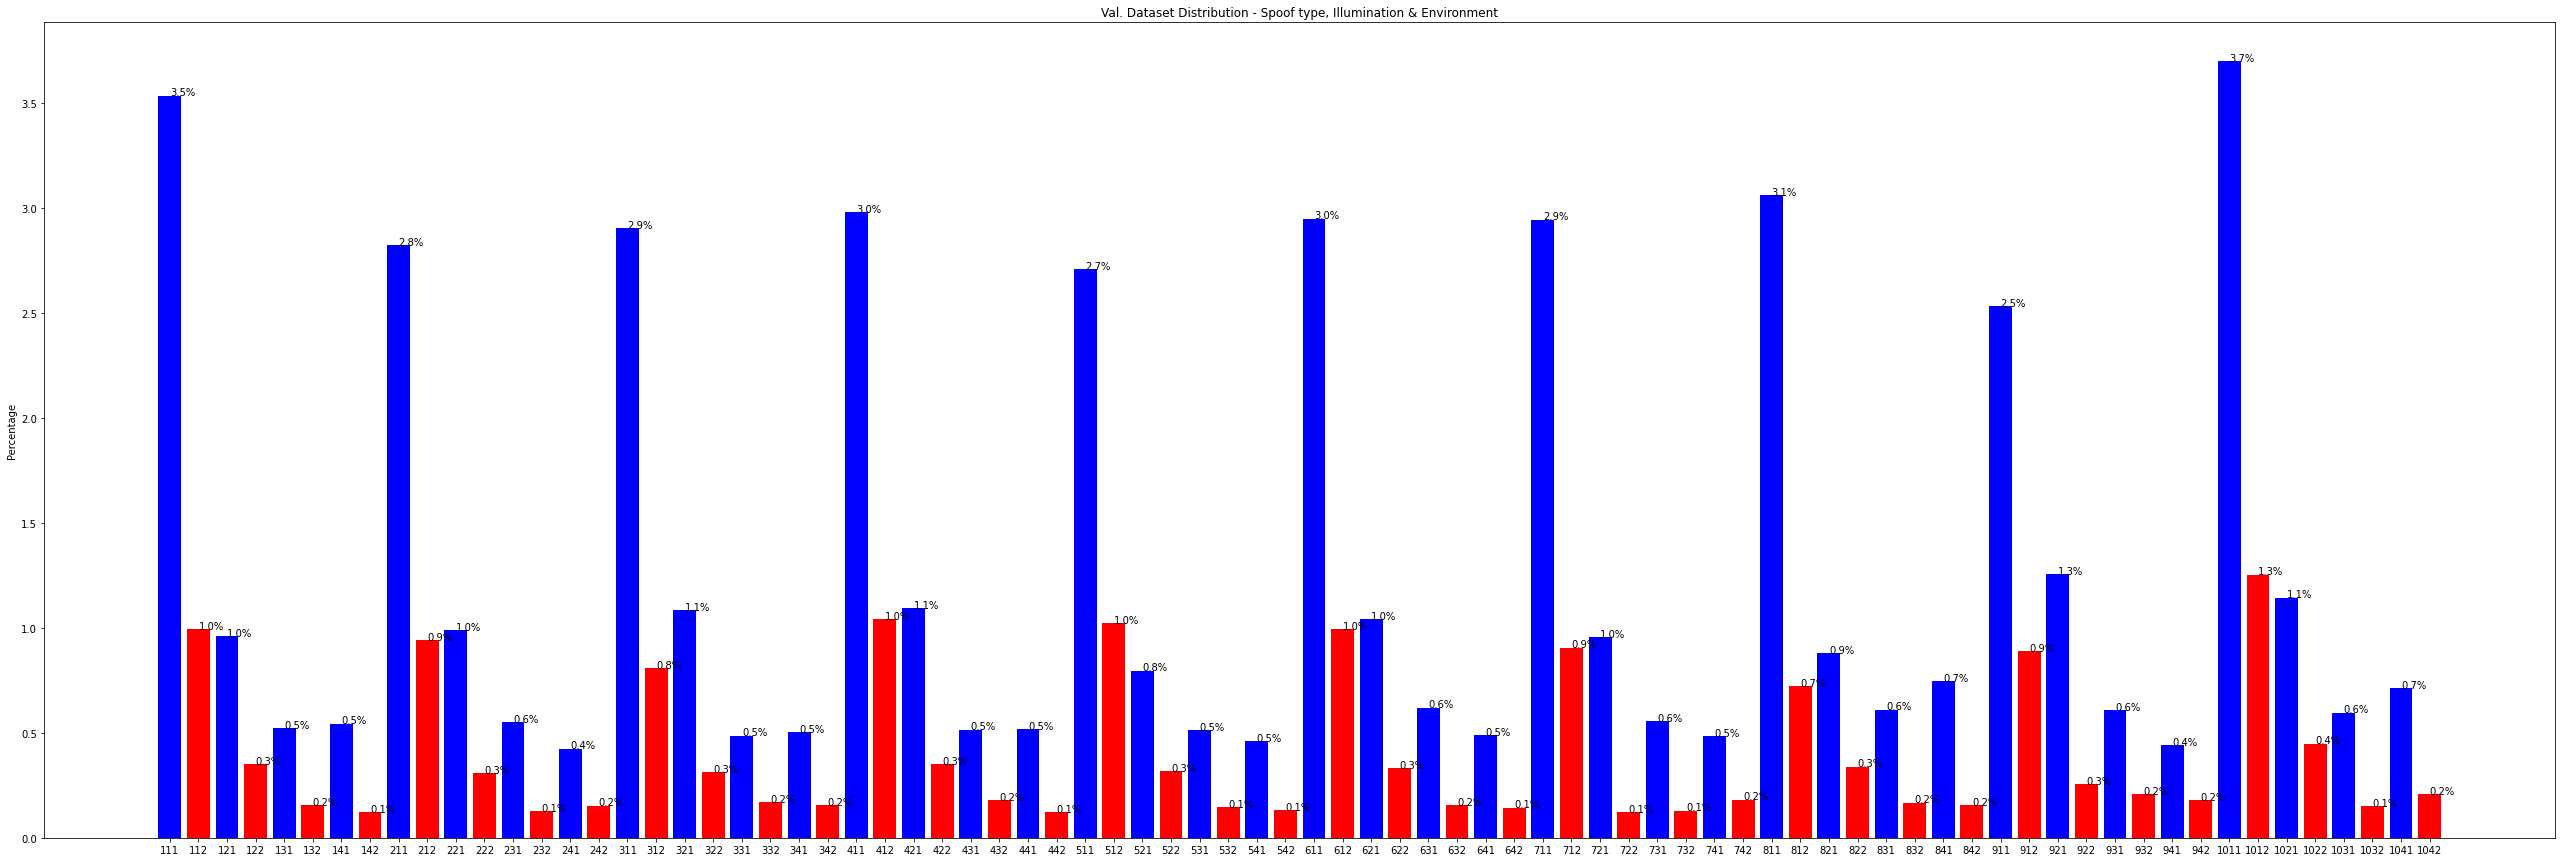

In [273]:
y_pos = np.arange(len(objects))
percentage5_v = []
for i in range(len(samples5_v)):
    percentage5_v.append(samples5_v[i])
plt.figure(figsize=(45,15))
plt.bar(y_pos, percentage5_v, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Val. Dataset Distribution - Spoof type, Illumination & Environment')
for index, value in enumerate(percentage5_v):
     plt.text(index, value, str(round(value,1))+"%")
#plt.savefig('val.jpg', dpi=1200)
plt.show()

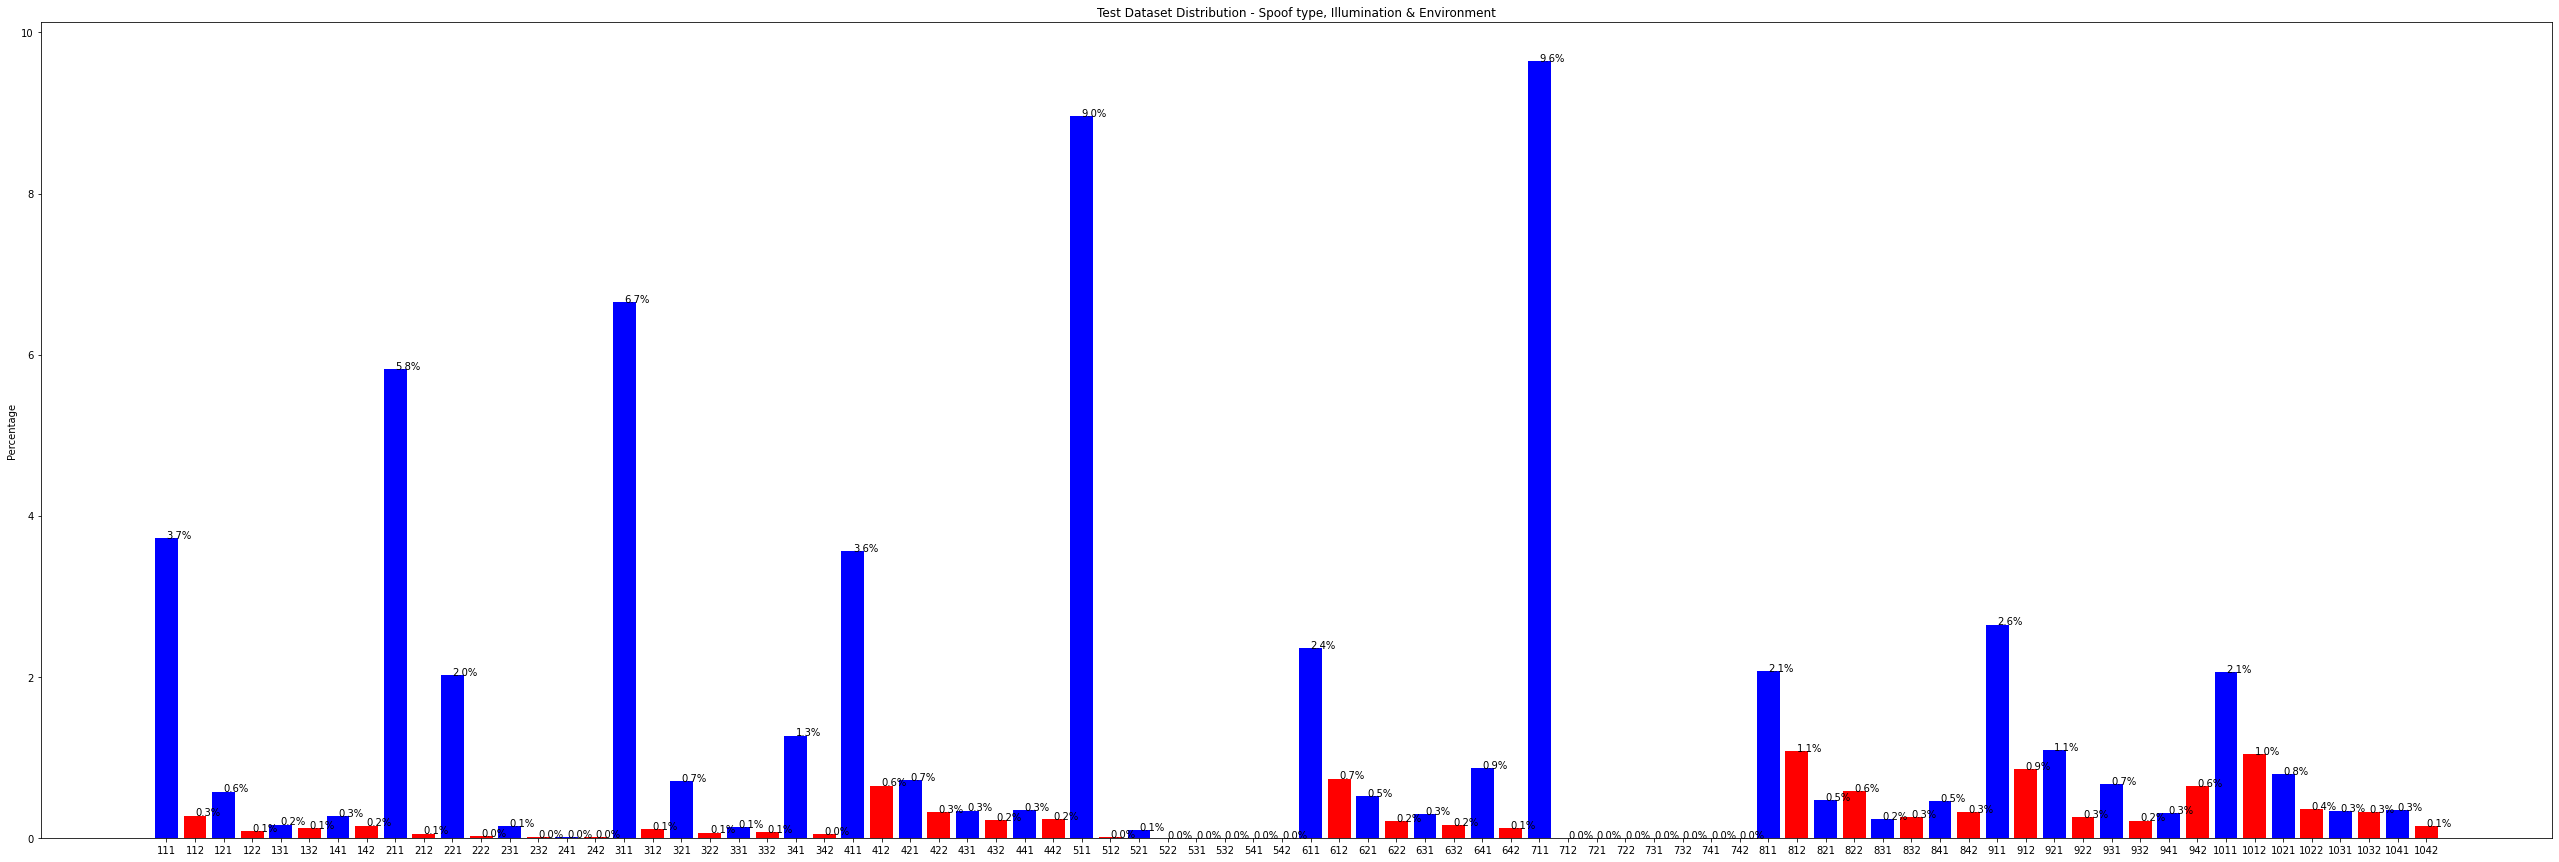

In [270]:
y_pos = np.arange(len(objects))
percentage5_te = []
for i in range(len(samples5_te)):
    percentage5_te.append(samples5_te[i])
plt.figure(figsize=(45,15))
plt.bar(y_pos, percentage5_te, align='center', alpha=1,color=['blue', 'red'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Test Dataset Distribution - Spoof type, Illumination & Environment')
for index, value in enumerate(percentage5_te):
     plt.text(index, value, str(round(value,1))+"%")

plt.show()

# Finding wrong predictions of test scores

In [122]:
import pandas as pd
import numpy as np

In [123]:
path = r"C:\Users\Pratyush\SWITCHdrive\grl-baseline\tgt_net_exp_037\test_score_4.txt" #path to test score
test_label = pd.read_json(r"C:\Users\Pratyush\SWITCHdrive\grl-baseline\myprotocol\test_label.json") #test_label json file

In [124]:
df_test = pd.read_csv(path, names =  ["Pr(spoof)", "Ground truth", "Location"])

In [125]:
df_test.head(5)

,Pr(spoof),Ground truth,Location
0,0.00014,1,ce/6323/spoof/535014
1,0.00000,0,ce/6567/live/556901
2,0.01544,1,ce/6336/spoof/495582
3,0.00000,0,ce/7438/live/553203
4,0.16198,1,ce/5223/spoof/547897


In [126]:
# wrong "spoof" prediction of actual live samples. Threshold of spoof probability = 0.65
df1 = df_test.loc[(df_test["Pr(spoof)"] >= 0.65) & (df_test["Ground truth"] == 0)]
df1

,Pr(spoof),Ground truth,Location
18,0.99996,0,ce/6919/live/497635
47,0.99263,0,ce/10059/live/523733
50,0.99057,0,ce/8978/live/542646
57,0.97654,0,ce/7245/live/504780
77,0.94757,0,ce/7072/live/496015
...,...,...,...
67103,0.99959,0,ce/9472/live/514241
67120,0.80176,0,ce/9715/live/510310
67135,0.99978,0,ce/8005/live/513516
67140,0.87508,0,ce/5061/live/557097


In [127]:
# wrong "live" prediction of actual spoof samples.
df2 = df_test.loc[(df_test["Pr(spoof)"] <= 0.35) & (df_test["Ground truth"] == 1)]
df2

,Pr(spoof),Ground truth,Location
0,0.00014,1,ce/6323/spoof/535014
2,0.01544,1,ce/6336/spoof/495582
4,0.16198,1,ce/5223/spoof/547897
8,0.00005,1,ce/9856/spoof/528955
9,0.09469,1,ce/6399/spoof/518535
...,...,...,...
67163,0.00725,1,ce/6293/spoof/560107
67164,0.00005,1,ce/7415/spoof/535513
67165,0.00003,1,ce/9343/spoof/519311
67166,0.00000,1,ce/5304/spoof/547675


In [128]:
df1 = df1["Location"].reset_index(drop=True) #for df1 - wrong "spoof" prediction of actual live samples
df2 = df2["Location"].reset_index(drop=True) #for df2 - wrong "live" prediction of actual spoof samples


In [129]:
location_df1 = []
location_df2 = []
for i in range(len(df1)):
    location_df1.append(df1[i])    
for i in range(len(df2)):
    location_df2.append(df2[i])
#location_df1

In [130]:
i,j=0,0
for st in location_df1:
    st = st.replace('ce','Data/test')
    st = st + ".png"
    location_df1[i]=st
    i+=1
for st in location_df2:
    st = st.replace('ce','Data/test')
    st = st + ".png"
    location_df2[j]=st
    j+=1

In [131]:
print(len(location_df1),len(location_df2))
#location_df1

4833 34780


In [132]:
test_label=test_label.T
test_label.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Data/test/6964/spoof/494405.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2,2,1
Data/test/9596/spoof/494406.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,2,2,1
Data/test/9014/spoof/494407.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,1,2,1
Data/test/7607/spoof/494408.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,1,1,1
Data/test/5624/spoof/494409.png,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,1,1


In [133]:
test_label = test_label.reset_index()

In [134]:
#test_label.loc[(test_label["index"]) == 'Data/test/9499/live/553474.png' ]

In [141]:
df1_final = pd.DataFrame()
df2_final = pd.DataFrame()

In [142]:
for i in range(len(location_df1)):
    df1_final = df1_final.append(test_label.loc[(test_label["index"]) == location_df1[i]])
for i in range(len(location_df2)):
    df2_final = df2_final.append(test_label.loc[(test_label["index"]) == location_df2[i]])

In [144]:
df1_final

,index,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,43
3230,Data/test/6919/live/497635.png,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
29328,Data/test/10059/live/523733.png,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
48241,Data/test/8978/live/542646.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10375,Data/test/7245/live/504780.png,0,1,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
1610,Data/test/7072/live/496015.png,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19836,Data/test/9472/live/514241.png,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
15905,Data/test/9715/live/510310.png,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
19111,Data/test/8005/live/513516.png,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
62692,Data/test/5061/live/557097.png,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [145]:
df2_final

,index,0,1,2,3,4,5,6,7,8,...,34,35,36,37,38,39,40,41,42,43
40609,Data/test/6323/spoof/535014.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,1
1177,Data/test/6336/spoof/495582.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,1
53492,Data/test/5223/spoof/547897.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,1,1,1
34550,Data/test/9856/spoof/528955.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,1,1,1
24130,Data/test/6399/spoof/518535.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65702,Data/test/6293/spoof/560107.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,4,1,1
41108,Data/test/7415/spoof/535513.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,1,1,1
24906,Data/test/9343/spoof/519311.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,1,1,1
53270,Data/test/5304/spoof/547675.png,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,1,1,1
